# Matrix Multiplication

It demonstrate how to perform matrix operations using pyclesperanto.

In [9]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

cle.select_device(1,"gpu") # default initialization

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.274.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Define two 2d arrays (matrix) and push them to the GPU

In [19]:
matrix1 = cle.push(np.asarray([[1, 2, 3, 4], [6, 7, 8, 9]]))
matrix2 = cle.push(np.asarray([[6, 7, 8], [9, 10, 11]]))

print(f"matrix 1 {matrix1.shape}:\n{matrix1}\n")
print(f"matrix 2 {matrix2.shape}:\n{matrix2}")

matrix 1 (2, 4):
[[1 2 3 4]
 [6 7 8 9]]

matrix 2 (2, 3):
[[ 6  7  8]
 [ 9 10 11]]


## Matrix multiplication requierement

For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix, such as the matrix shape should fit `(n,k) x (k,m) = (n,m)`

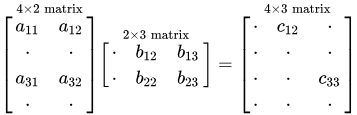

> See [Matrix Multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) in wikipedia

In our case, if we try to multiply our `matrix1 x matrix2`, we have  the shapes `(2,4) x (2,3)` with `4 != 2`, and an expected output shape of `(2,3)` we observe the following:

In [16]:
res_matrix = cle.multiply_matrix(matrix1, matrix2)
print(f"{matrix1.shape} x {matrix2.shape} = {res_matrix.shape}")
res_matrix

(2, 4) x (2, 3) = (2, 3)


array([[ 24.,  27.,  30.],
       [ 99., 112., 125.]], dtype=float32, mtype=buffer)

We have a warning on the dimension incompatibility 

To multiply these matrices we need to have the correspondance of dimension as explained before, in this case we would need to transpose the matrix 1. 
We would have `matrix1.T x matrix2`, hence we have `(4,2) x (2,3)` with `2 == 2`, with an output of shape `(4,3)`. This fit the shape criteria, we can apply the function:

In [18]:
res_matrix = cle.multiply_matrix(matrix1.T, matrix2)
print(f"{matrix1.T.shape} x {matrix2.shape} = {res_matrix.shape}")
res_matrix

(4, 2) x (2, 3) = (4, 3)


array([[ 60.,  67.,  74.],
       [ 75.,  84.,  93.],
       [ 90., 101., 112.],
       [105., 118., 131.]], dtype=float32, mtype=buffer)

## Elementwise matrices multiplication

Elementwise operation between matrices (e.g. multiplication, division, addition, etc.) would be equivalent to image arythmetics and use functions `like multiply_images` or `add_images_with_weight`. The principal criteria is that the images (matrices) are of same shape.

In [6]:
# generate another matrix of the same size with random values
another_matrix = cle.push(np.random.random(matrix1.shape))

# element by element multiplication
matrix_element_wise_multiplied = cle.multiply_images(matrix1, another_matrix)

matrix_element_wise_multiplied

array([[0, 0, 2, 0],
       [4, 1, 5, 7]], dtype=int32, mtype=buffer)

## Elementwise multiplication of a matrix with a scalar

Similar but this time matrix x scalar, we can use function like `multiply_image_and_scalar`, but also `divide_image_by_scalar` or `add_image_and_scalar`

In [7]:
elements_times_2 = cle.multiply_image_and_scalar(matrix1, scalar=2)
elements_times_2

array([[ 2,  4,  6,  8],
       [12, 14, 16, 18]], dtype=int32, mtype=buffer)

__Important:__ while elementwise operation are nD, matrix multiplication is restricted to 2D matrices